In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from a2c.a2c import A2C
from environments.continuous_teaching import ContinuousTeaching

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching
from human_agents import generate_agents
from visualization_utils.episode_runs import run_one_episode


from baseline_policies.conservative import Conservative 


In [2]:
exp1=A2C.load('runs/discont_exp/run_1')
exp15=A2C.load('runs/discont_exp/run_1.5')
exp2=A2C.load('runs/discont_exp/run_2')
exp3=A2C.load('runs/discont_exp/run_3')
exp4=A2C.load('runs/discont_exp/run_4')


In [17]:
model=exp2
env1=model.env
env1.t_max = 600
env1.reward_coeff

1

In [14]:
rewards, actions=run_one_episode(env1, model, 3)

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 2689.78it/s]

a2c | final reward 60 | precision 1.43


In [26]:
# monotonic case
b = [0]
for x in rewards:
    b += [b[-1] + x]

In [5]:
# exponential case
rewards = np.log10(np.array(rewards)) * env1.n_item

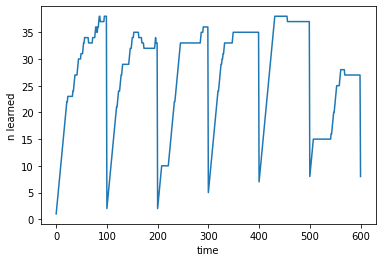

In [6]:
n_learned = np.array(rewards)#/20*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

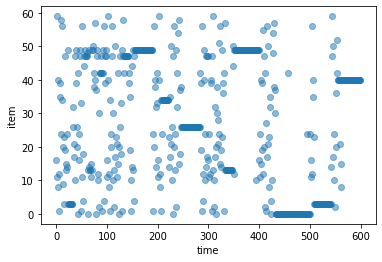

In [7]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env1.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

In [48]:
env1.obs[0]

array([0.        , 0.        , 0.17122265])

In [19]:
policy = Conservative(env=env1)
# rewards2, actions2 = run_one_episode(env1, policy, is_a2c=False)

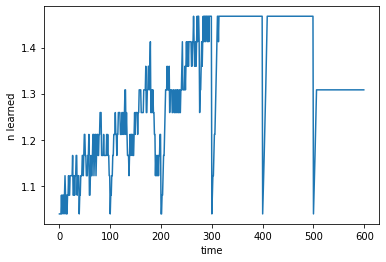

In [130]:
n_learned = np.array(rewards2)#*env1.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

In [10]:
model=exp1

In [170]:
env1.reward_coeff

1

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 2065.85it/s]


a2c | final reward 69 | precision 1.46
a2c 3.999999999999999


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 93.66it/s]


conservative | final reward 88 | precision 8.01
cons 9.999999999999998


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1975.19it/s]


a2c | final reward 69 | precision 1.46
a2c 3.999999999999999


100%|████████████████████████████████████████▉| 599/600 [00:06<00:00, 95.01it/s]


conservative | final reward 88 | precision 8.01
cons 9.999999999999998


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1442.37it/s]


a2c | final reward 81 | precision 2.04
a2c 7.999999999999998


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 69.23it/s]


conservative | final reward 257 | precision 6.79
cons 38.0


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1402.86it/s]


a2c | final reward 81 | precision 1.70
a2c 7.999999999999998


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 68.14it/s]


conservative | final reward 119 | precision 6.30
cons 17.999999999999996


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1169.51it/s]


a2c | final reward 64 | precision 1.35
a2c 2.0


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 68.30it/s]

conservative | final reward 84 | precision 9.42
cons 9.000000000000002


Text(0.5, 0.98, 'Forget: 0.00589817767969725, \n Repetition: 0.386738137127553')

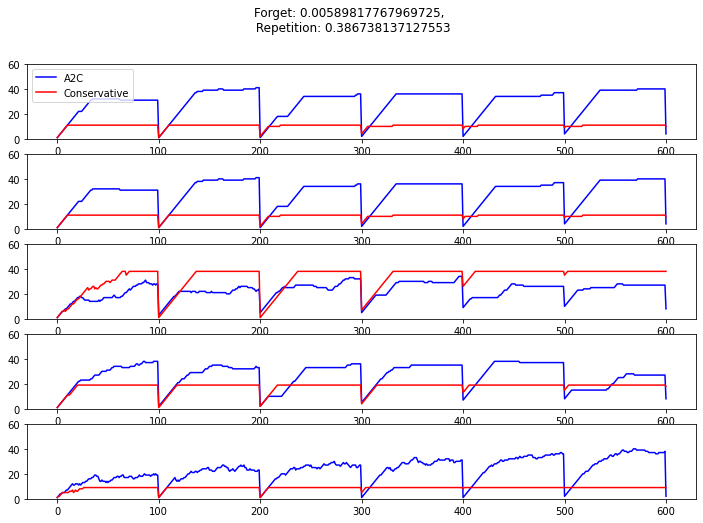

In [20]:
fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    nl1 = np.array(r1)#*env.n_item
    nl1 = np.log10(nl1) * env1.n_item
    axs[i].plot(nl1, color='b', label='A2C')
    print('a2c', nl1[-1])
    
    r2, a2 = run_one_episode(env1, policy, i)
    nl2 = np.array(r2)#*env.n_item
    nl2 = np.log10(nl2) * env1.n_item
    axs[i].plot(nl2, color='r', label='Conservative')
    axs[i].set_ylim(0,60)
    print('cons', nl2[-1])
        
axs[0].legend()

fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

Text(0.5, 1.0, 'Conservative')

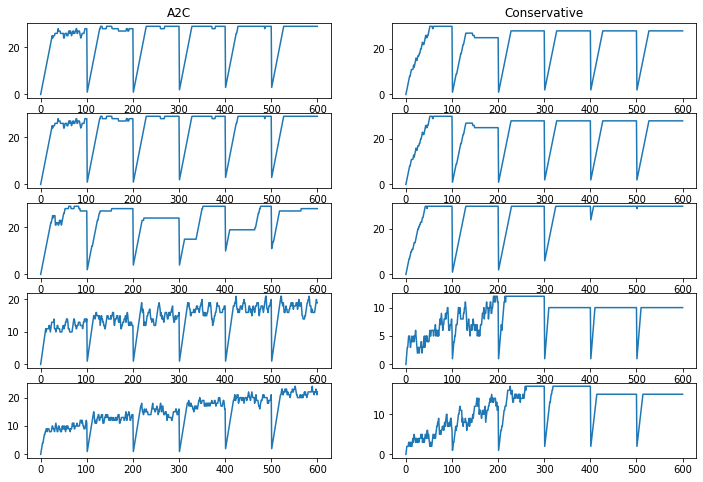

In [45]:
# monotonic case

fig, axs = plt.subplots(5, 2, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
    b = [0]
    for x in nl1:
        b += [b[-1] + x]
    axs[i, 0].plot(b)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
    b = [0]
    for x in nl2:
        b += [b[-1] + x]
    axs[i, 1].plot(b)
axs[0, 0].set_title('A2C')
axs[0, 1].set_title('Conservative')

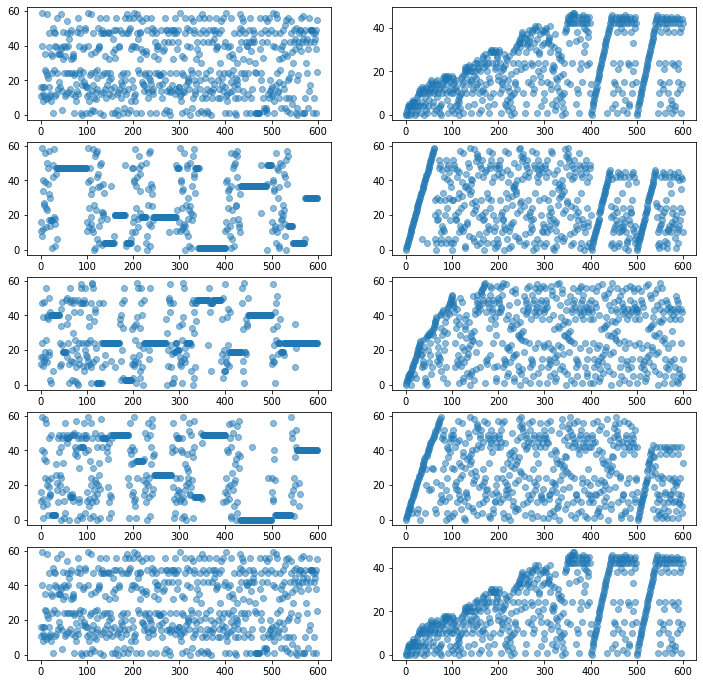

In [249]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    axs[i, 0].scatter(np.arange(env1.t_max), a1, alpha=0.5)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    axs[i, 1].scatter(np.arange(env1.t_max), a2, alpha=0.5)